# Grafos

Son estructuras convenientes al tener datos en forma de red, por ejemplo una red social, transporte de pasajeros, análisis geoespacial o logística.

Es un conjunto de puntos (nodos) unidos por un conjunto de líneas (conexiones), creado por Euler en busca de solucionar un problema con un puente. 

Con las matemáticas se puede estudiar, por ejemplo, cual es el nodo más importante de la red, si la red se puede visitar por completo pasando por todos sus nodos sin repetirlos, propiedades de los nodos y de la red completa

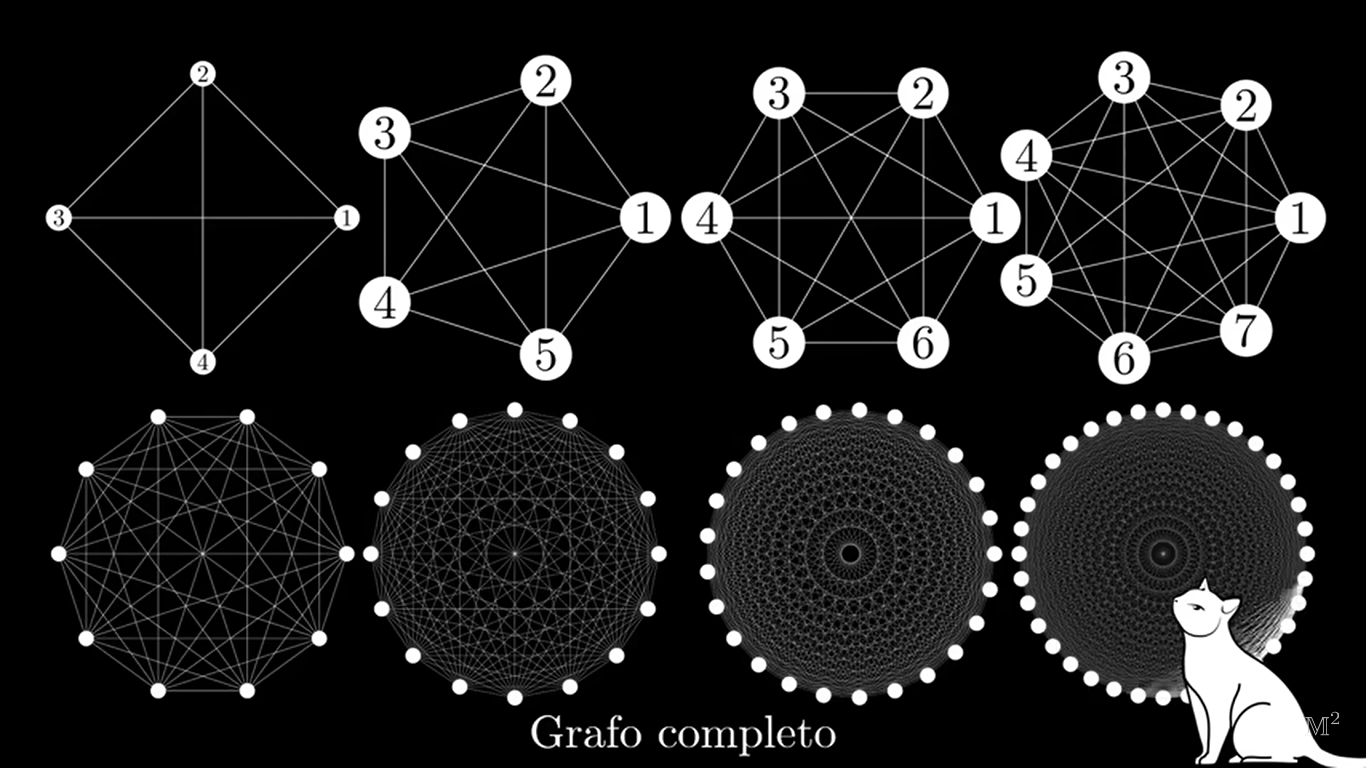

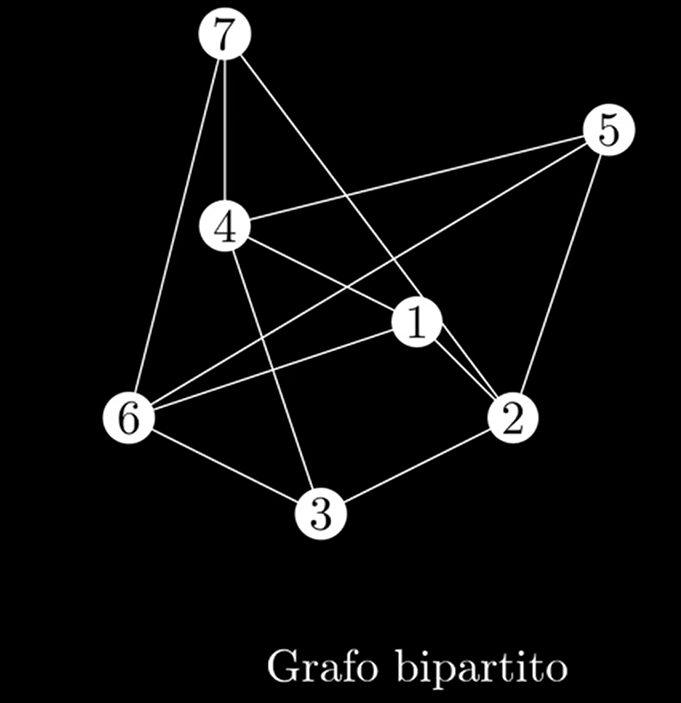

## Información a partir de un grafo

### Grado

Cuantas conexiones tiene cada nodo.

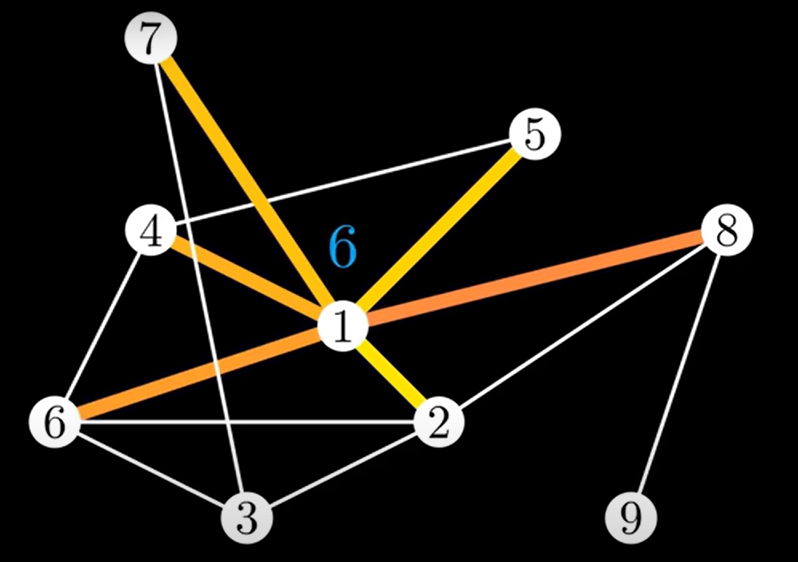

Sirve como una medidad de centralidad, la **centralidad de grado**, donde se dice que el nodo con mayor grado es el más importante de la red.

Pasos:
1. Calcular el grado de centralidad de cada nodo
2. Normalización: $grado/(n-1)$ donde n es el número total de nodos
3. Seleccionar el mayor (más importante)

### Camino

Es el recorrido de conexiones requerido para ir de un nodo a otro

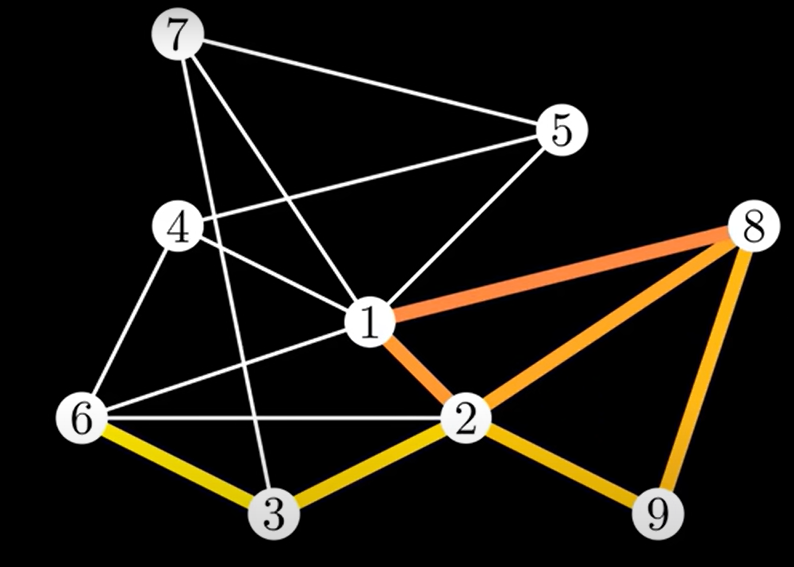

Para que haya un camino euleriano, o sea que todos los nodos puedan ser recorridos sin ser repetidos, tiene que haber solo 2 nodos de grado impar y si hay 2, el camino debe empezar por alguno de estos. En cambio si se quiere llegar al mismo punto en donde se empezó, todos los nodos deben tener grado par.

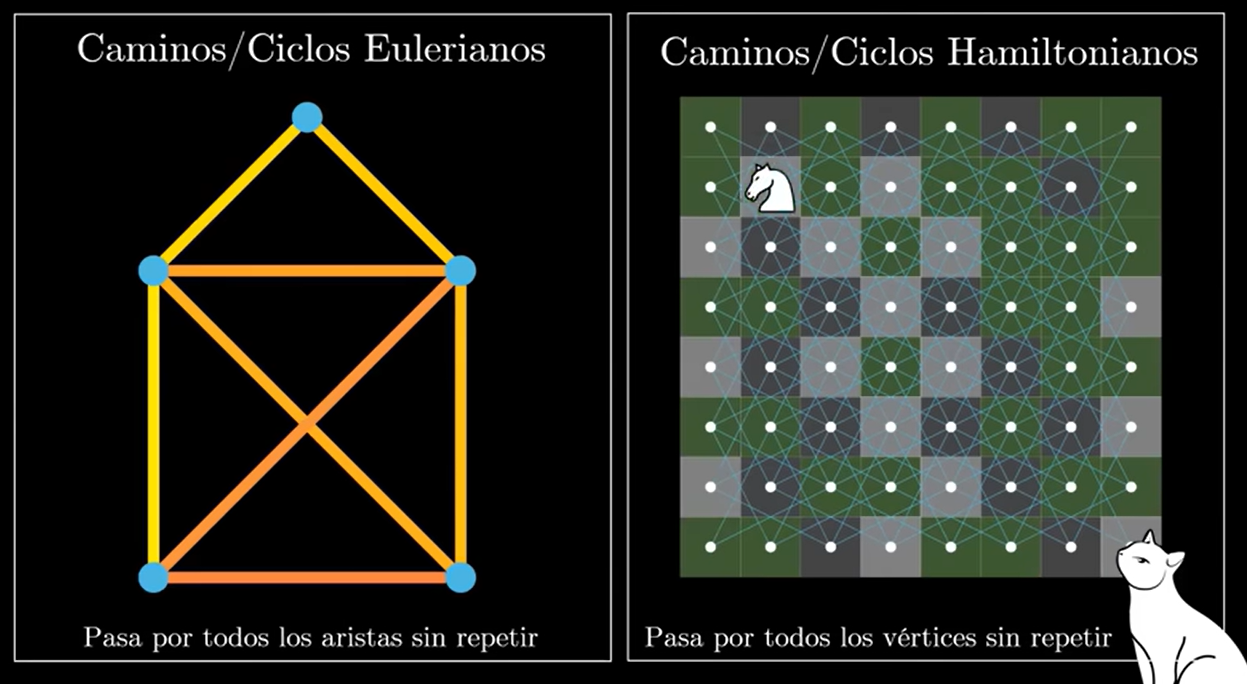

También sirve como métrica, **centralidad de cercanía**, donde se define al más importante como al nodo más cercano al resto.

Pasos:
1. Para cada nodo, calcular las rutas más cortas de él a todos los otros nodos y obtener su longitud total.
2. Normalización: $(n-1)/longitud$
3. Seleccionar el mayor (más importante)

Para calcular las distancias del paso 1 hay varios algoritmos, como el algoritmo de dijkstra

Otra métrica es la **centralidad de intermediación** que explica cual es el nodo que más sirve como intermediario para hacer más cortas las conexiones entre nodos.

Pasos:

1. Calcular las rutas más cortas entre todos los nodos.
2. Para cada nodo, contar cuantas veces aparece en estas rutas como conexión, no se cuenta el nodo de origen ni el nodo destino.
3. Normalización: $conteo/((n-1)*(n-2)/2)$
4. Seleccionar el mayor (más importante)

#### Ciclo

Son caminos cerrados, o sea que llevan al punto inicial

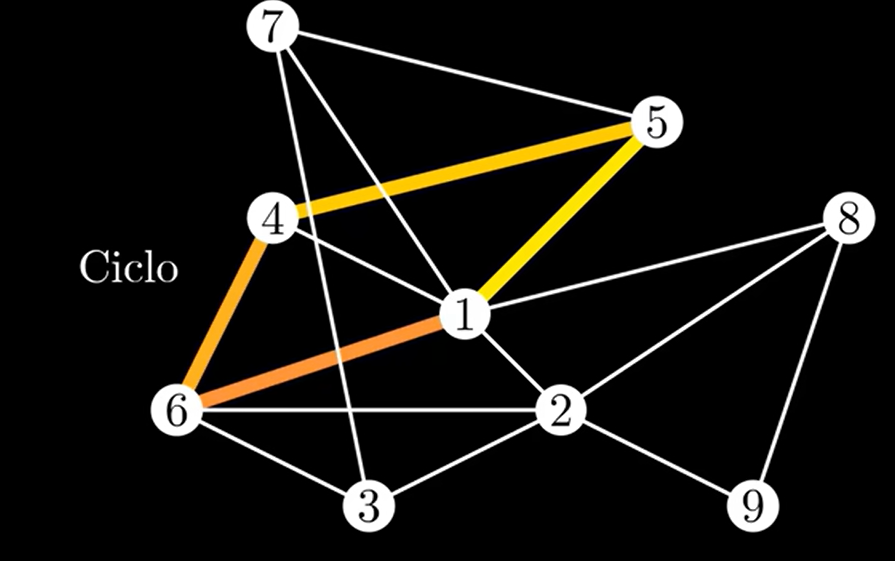

### Diametro de un grafo

Es la distancia máxima que hay entre un punto y otro

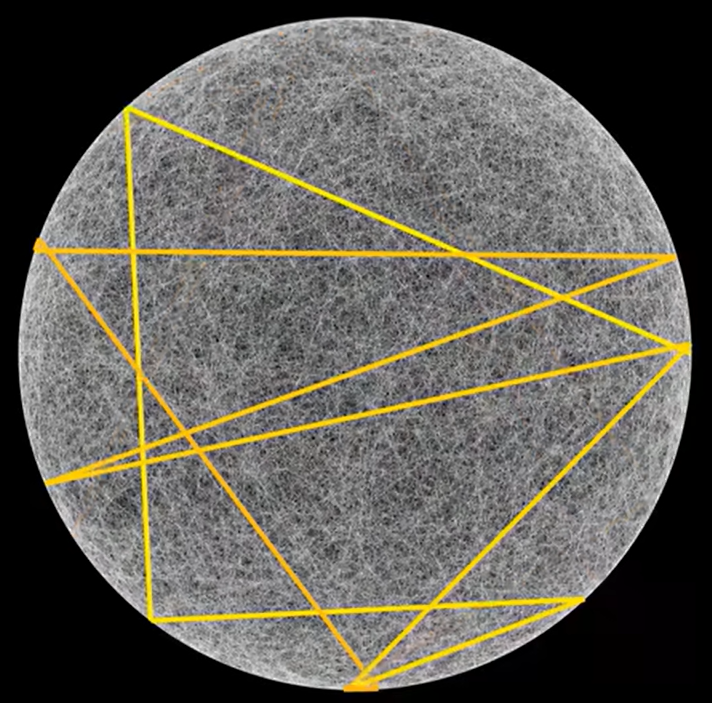

## Implementación con Networkx

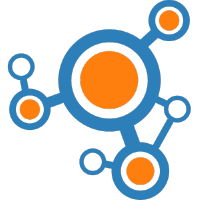

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Gráficos no dirigidos

#### Creación de grafo

In [3]:
graph = nx.Graph()

# Agregando nodos
graph.add_nodes_from(["maría", "luis", "claudia", "pedro"])

# Agregando conexiones
graph.add_edge("maría", "luis", weight=4)
graph.add_edge("maría", "claudia", weight=10)
graph.add_edge("luis", "pedro", weight=2)
graph.add_edge("pedro", "maría", weight=3)

print(f"Numero de nodos: {graph.number_of_nodes()}")
print(graph.nodes)
print(f"Numero de conexiones: {graph.number_of_edges()}")
print(graph.edges)

Numero de nodos: 4
['maría', 'luis', 'claudia', 'pedro']
Numero de conexiones: 4
[('maría', 'luis'), ('maría', 'claudia'), ('maría', 'pedro'), ('luis', 'pedro')]


#### Visualización

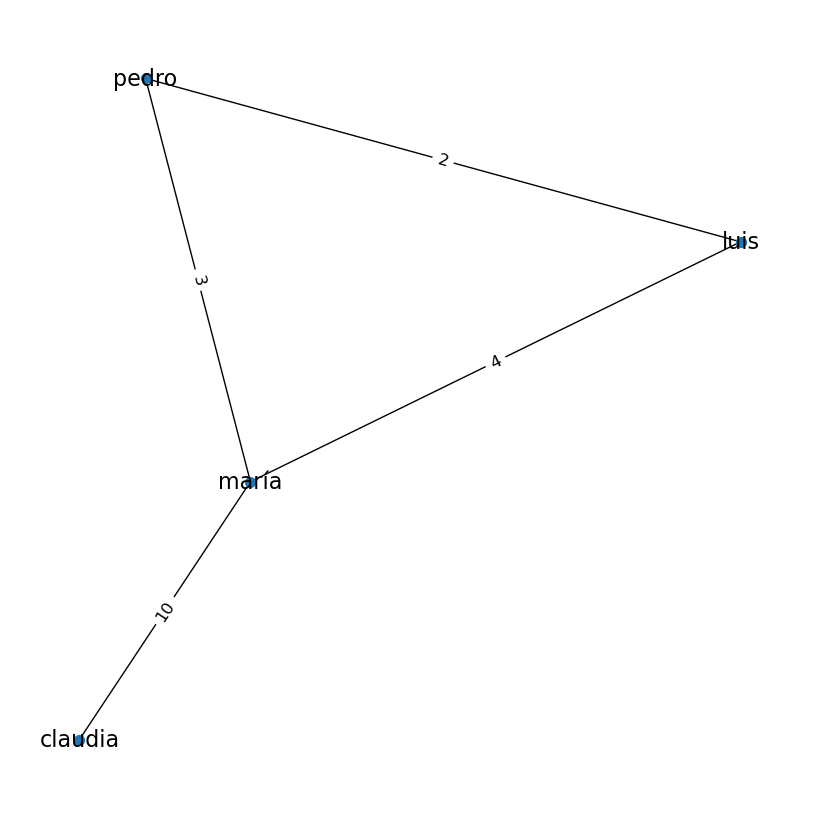

In [4]:
plt.figure(figsize=(8, 8))

scale = 50

# Posiciona los ejes
pos = nx.spring_layout(graph, seed=42)

# Extrae los pesos de las conexiones
weights = nx.get_edge_attributes(graph, "weight")

# Dibuja las conexiones
nx.draw(graph, pos, with_labels=True, node_size=scale, font_size = scale//3)

# Dibuja las etiquetas de las conexiones
nx.draw_networkx_edge_labels(graph, pos, edge_labels=weights, font_size=scale // 4)

plt.show()

### Grafos dirigidos

#### Creación del grafo

In [5]:
digraph = nx.DiGraph()

# Agregando nodos
digraph.add_nodes_from(["maría", "luis", "claudia", "famos@"])

# Agregando conexiones (El orden importa)
digraph.add_edge("maría", "famos@")
digraph.add_edge("luis", "famos@")
digraph.add_edge("claudia", "famos@")

print(f"Numero de nodos: {digraph.number_of_nodes()}")
print(digraph.nodes)
print(f"Numero de conexiones: {digraph.number_of_edges()}")
print(digraph.edges)

Numero de nodos: 4
['maría', 'luis', 'claudia', 'famos@']
Numero de conexiones: 3
[('maría', 'famos@'), ('luis', 'famos@'), ('claudia', 'famos@')]


#### Visualización

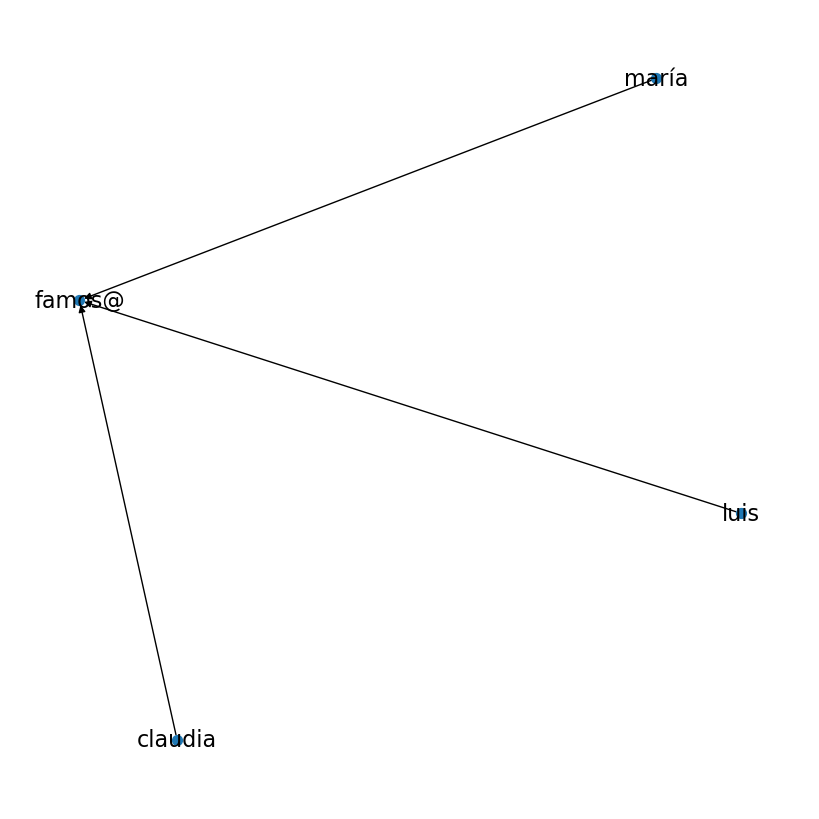

In [6]:
plt.figure(figsize=(8, 8))

scale = 50

# Posiciona los ejes
pos = nx.spring_layout(digraph, seed=42)

# Dibuja las conexiones
nx.draw(digraph, pos, with_labels=True, node_size=scale, font_size = scale//3)


plt.show()

### Métricas de centralidad

#### Creación de la red

In [11]:
# Numero de nodos
n = 25

graph = nx.fast_gnp_random_graph(n=n, seed=42, p=0.1)

#### Visualización

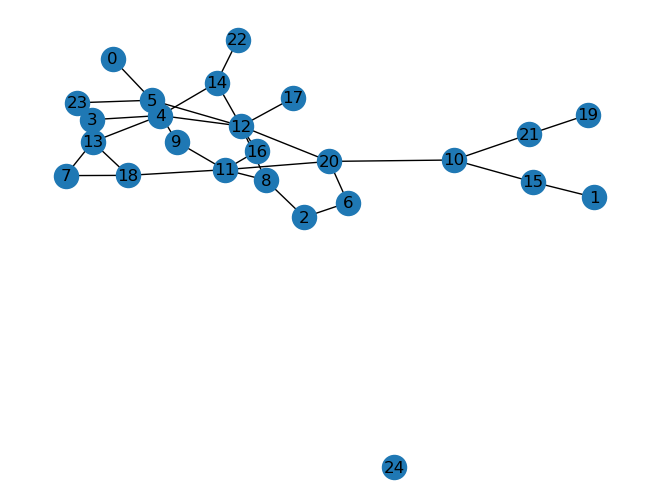

In [13]:
pos = nx.spring_layout(graph, seed=42)

nx.draw(graph, pos, with_labels=True)
plt.show()

#### Centralidad de grado

In [15]:
nx.degree_centrality(graph)

{0: 0.041666666666666664,
 1: 0.041666666666666664,
 2: 0.08333333333333333,
 3: 0.08333333333333333,
 4: 0.20833333333333331,
 5: 0.20833333333333331,
 6: 0.08333333333333333,
 7: 0.08333333333333333,
 8: 0.125,
 9: 0.08333333333333333,
 10: 0.125,
 11: 0.20833333333333331,
 12: 0.29166666666666663,
 13: 0.20833333333333331,
 14: 0.125,
 15: 0.08333333333333333,
 16: 0.08333333333333333,
 17: 0.041666666666666664,
 18: 0.125,
 19: 0.041666666666666664,
 20: 0.16666666666666666,
 21: 0.08333333333333333,
 22: 0.041666666666666664,
 23: 0.08333333333333333,
 24: 0.0}

#### Centralidad de cercanía

In [26]:
dict(sorted(nx.closeness_centrality(graph).items(), key=lambda item: item[1], reverse=True))

{12: 0.46897163120567376,
 20: 0.44083333333333335,
 4: 0.40075757575757576,
 11: 0.40075757575757576,
 5: 0.38669590643274854,
 8: 0.36736111111111114,
 14: 0.35551075268817206,
 16: 0.3498677248677249,
 9: 0.3444010416666667,
 10: 0.3444010416666667,
 18: 0.3391025641025641,
 13: 0.3241421568627451,
 6: 0.3194444444444444,
 17: 0.3194444444444444,
 3: 0.30613425925925924,
 23: 0.30613425925925924,
 2: 0.29786036036036034,
 7: 0.28625541125541126,
 0: 0.2790084388185654,
 15: 0.26240079365079366,
 21: 0.26240079365079366,
 22: 0.26240079365079366,
 1: 0.20794025157232707,
 19: 0.20794025157232707,
 24: 0.0}

In [29]:
dict(sorted(nx.betweenness_centrality(graph).items(), key=lambda item: item[1], reverse=True))

{12: 0.40132850241545887,
 20: 0.3878019323671498,
 10: 0.2898550724637681,
 11: 0.1702898550724638,
 5: 0.16014492753623186,
 4: 0.14432367149758454,
 14: 0.07971014492753624,
 15: 0.07971014492753624,
 21: 0.07971014492753624,
 18: 0.07258454106280193,
 13: 0.07137681159420288,
 8: 0.06171497584541062,
 6: 0.021739130434782608,
 9: 0.012198067632850243,
 23: 0.010869565217391304,
 16: 0.007367149758454106,
 2: 0.0036231884057971015,
 0: 0.0,
 1: 0.0,
 3: 0.0,
 7: 0.0,
 17: 0.0,
 19: 0.0,
 22: 0.0,
 24: 0.0}